In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from PIL import Image

In [2]:
import os 
os.chdir('..')

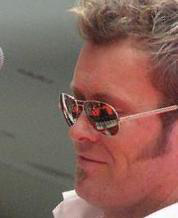

In [20]:
Image.open('data/celeba/img_align_celeba/201010.jpg')

In [5]:
from torchvision.transforms import CenterCrop, Resize

In [21]:
def preprocess(paths):
    base_path, target_path, file = paths
    downsample_size = 32
    img = Image.open(os.path.join(base_path, file))
    crop = CenterCrop(img.width)
    scale = Resize(downsample_size)
    img = scale(crop(img))
    img.save(os.path.join(target_path, file.replace('jpg', 'png')))

In [23]:
os.makedirs('data/celeba/preprocessed')

In [24]:
from multiprocessing import Pool

In [29]:
base_path = 'data/celeba/img_align_celeba'
target_path = 'data/celeba/preprocessed'
files = os.listdir(base_path)
paths = [(base_path, target_path, file) for file in files]

In [ ]:
pool = Pool()
processes = pool.imap_unordered(preprocess, paths)
iterator = tqdm(processes, total=len(paths)) 
for _ in iterator:
    pass
pool.close()
pool.join()

CPU times: user 17.6 ms, sys: 4.67 ms, total: 22.3 ms
Wall time: 19.4 ms


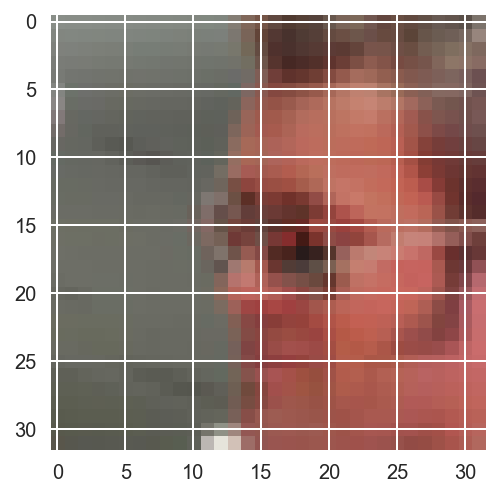

In [16]:
%%time
plt.imshow(preprocess('data/celeba/img_align_celeba/201010.jpg'))